In [78]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data Loading & Exploration

In [79]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv", index_col = 0)

In [80]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [81]:
print(df.shape)
print(df.size)

(103, 6)
618


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     103 non-null    object
 1   Continent                   103 non-null    object
 2   Production (Tons)           103 non-null    object
 3   Production per Person (Kg)  103 non-null    object
 4   Acreage (Hectare)           102 non-null    object
 5   Yield (Kg / Hectare)        102 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


# Data Cleaning

In [83]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".", ",").str.replace(",", "")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".", "").str.replace(",", ".")
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


In [84]:
df.rename(columns = {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)": "Production_per_Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


In [85]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [86]:
df[df["Acreage(Hectare)"].isna()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [87]:
df.dropna()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


In [88]:
f_cols = ["Production(Tons)", "Production_per_Person(Kg)", "Acreage(Hectare)", "Yield(Kg/Hectare)"]
for col in f_cols:
    df[col] = df[col].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    103 non-null    object 
 1   Continent                  103 non-null    object 
 2   Production(Tons)           103 non-null    float64
 3   Production_per_Person(Kg)  103 non-null    float64
 4   Acreage(Hectare)           102 non-null    float64
 5   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.6+ KB


In [89]:
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [90]:
df["Continent"] = df["Continent"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Country                    103 non-null    object  
 1   Continent                  103 non-null    category
 2   Production(Tons)           103 non-null    float64 
 3   Production_per_Person(Kg)  103 non-null    float64 
 4   Acreage(Hectare)           102 non-null    float64 
 5   Yield(Kg/Hectare)          102 non-null    float64 
dtypes: category(1), float64(4), object(1)
memory usage: 5.1+ KB


# Univariate Analysis

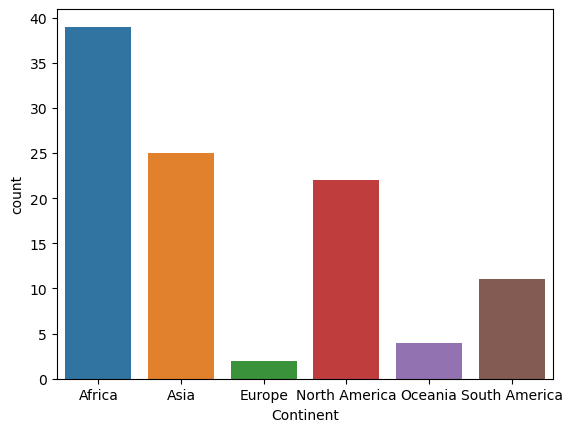

In [91]:
sns.countplot(data = df, x = "Continent")
plt.show()

<Figure size 1000x1000 with 0 Axes>

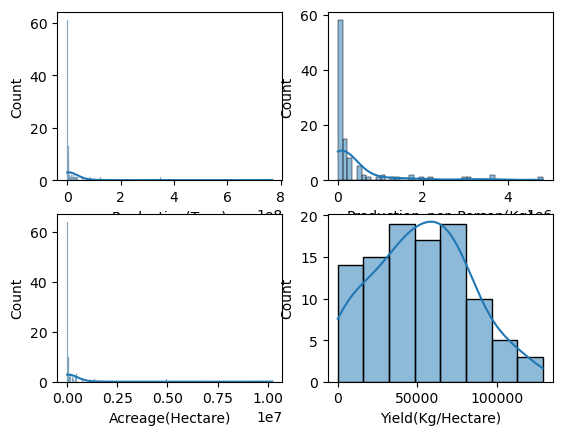

In [92]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2, 2)

ax1 = sns.histplot(data=df, x="Production(Tons)", kde=True, ax=ax[0, 0])
ax2 = sns.histplot(data=df, x="Production_per_Person(Kg)", kde=True, ax=ax[0, 1])
ax3 = sns.histplot(data=df, x="Acreage(Hectare)", kde=True, ax=ax[1, 0])
ax4 = sns.histplot(data=df, x="Yield(Kg/Hectare)", kde=True, ax=ax[1, 1])

plt.show()

<Figure size 1000x1000 with 0 Axes>

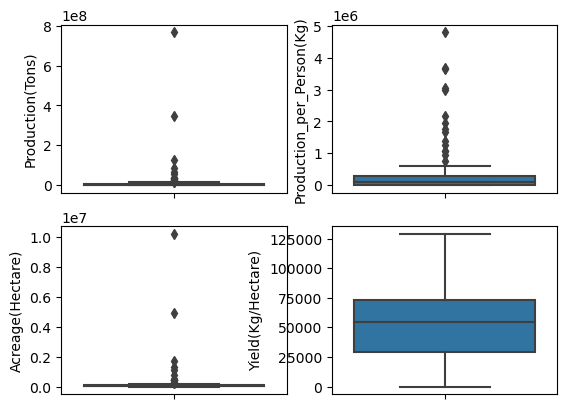

In [93]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2, 2)

ax1 = sns.boxplot(data=df, y="Production(Tons)", ax=ax[0, 0])
ax2 = sns.boxplot(data=df, y="Production_per_Person(Kg)", ax=ax[0, 1])
ax3 = sns.boxplot(data=df, y="Acreage(Hectare)", ax=ax[1, 0])
ax4 = sns.boxplot(data=df, y="Yield(Kg/Hectare)", ax=ax[1, 1])

plt.show()

# Bivariate Analysis

In [94]:
df["Percent Production"] = df["Production(Tons)"]/df["Production(Tons)"].sum() * 100
df["Percent Production"] = df["Percent Production"].apply(lambda x: "{:.2f}".format(x)).astype("float")
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Percent Production
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5,40.73
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5,18.46
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1,6.52
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2,4.63
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.47
...,...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.0,3.0,28386.4,0.00
99,Djibouti,Africa,53.0,51.0,NaN,NaN,0.00
100,Singapore,Asia,50.0,9.0,2.0,25.0,0.00
101,Samoa,Oceania,12.0,6.0,1.0,11949.8,0.00


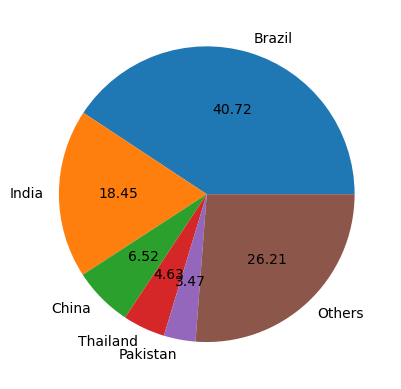

In [95]:
new_data = {"Country": ["Others"], "Percent Production": [df.iloc[5:, 6].sum()]}
df_imp = pd.concat([df[["Country", "Percent Production"]].head(), pd.DataFrame(new_data)], ignore_index=True)
plt.pie(df_imp["Percent Production"], autopct = "%.2f", labels = df_imp["Country"])
plt.show()
del df["Percent Production"]

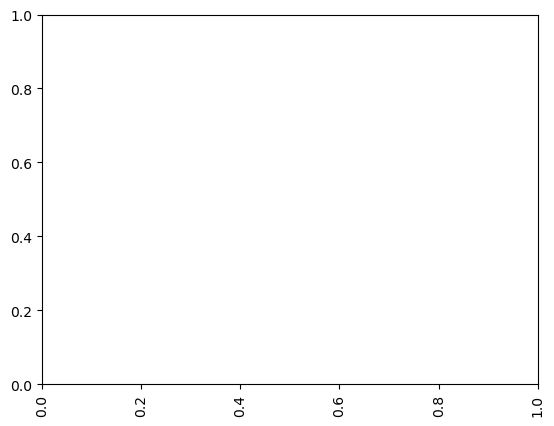

In [96]:
sns.barplot(data = df.iloc[0:10,:].sort_values("Production(Tons)", ascending = False), x = "Country", y = "Production(Tons)", ax = ax[0,0])
plt.xticks(rotation = 90)
plt.show()

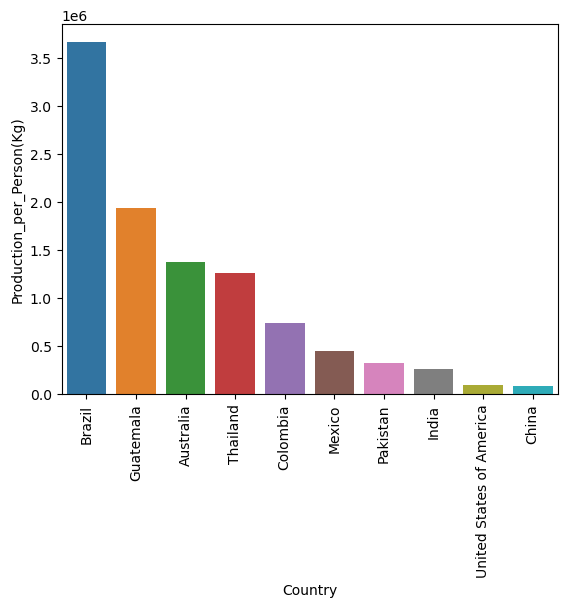

In [97]:
sns.barplot(data = df.iloc[0:10,:].sort_values("Production_per_Person(Kg)", ascending = False), x = "Country", y = "Production_per_Person(Kg)")
plt.xticks(rotation = 90)
plt.show()

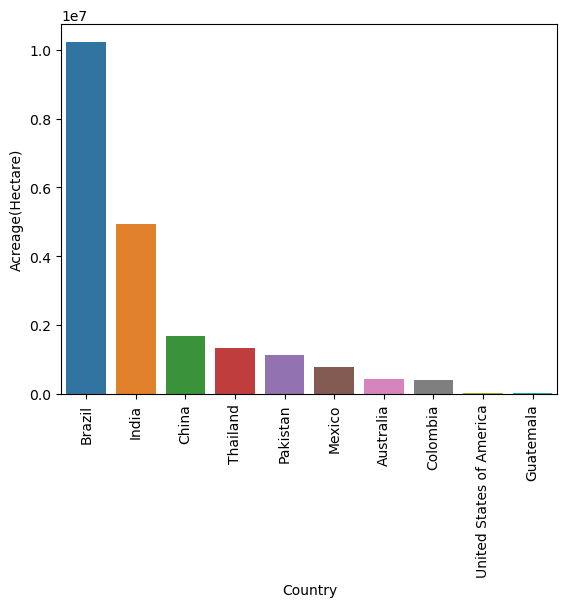

In [98]:
sns.barplot(data = df.iloc[0:10,:].sort_values("Acreage(Hectare)", ascending = False), x = "Country", y = "Acreage(Hectare)")
plt.xticks(rotation = 90)
plt.show()

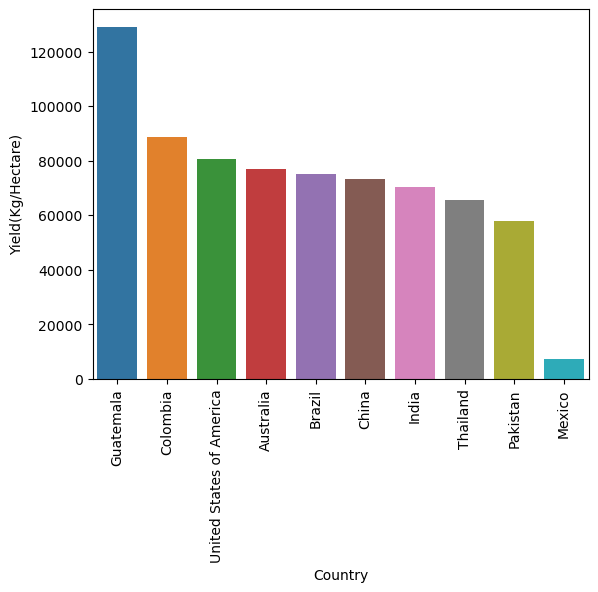

In [99]:
sns.barplot(data = df.iloc[0:10,:].sort_values("Yield(Kg/Hectare)", ascending = False), x = "Country", y = "Yield(Kg/Hectare)")
plt.xticks(rotation = 90)
plt.show()

<Axes: >

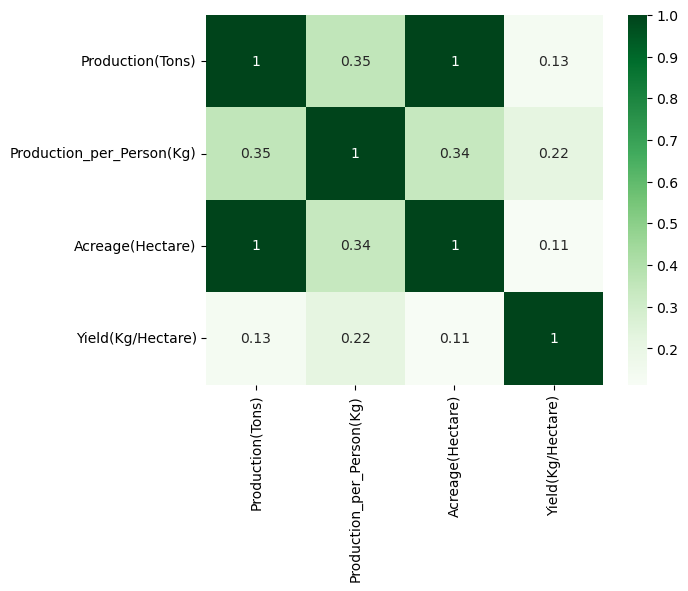

In [100]:
df.iloc[:, 2:].corr()
sns.heatmap(data = df.iloc[:, 2:].corr(), annot = True, cmap = "Greens")

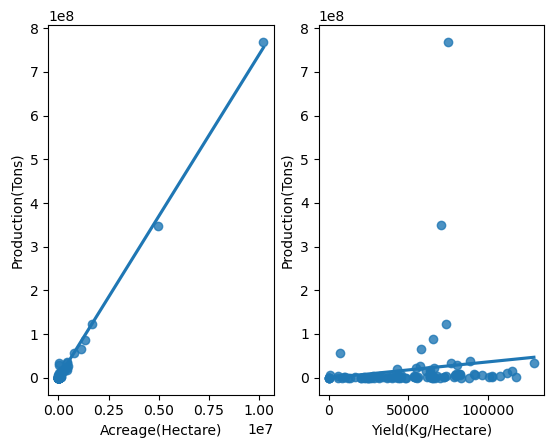

In [101]:
fig, ax = plt.subplots(1,2)
sns.regplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", ci = None, ax = ax[0])
sns.regplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)", ci = None, ax = ax[1])
plt.show()

In [102]:
df_cn = df.copy()
del df_cn["Country"]
df_cn.groupby(by=["Continent"]).sum()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681525.0,10144161.0,1439089.0,2142107.5
Asia,721930425.0,3120808.0,10608319.0,1171871.4
Europe,5823.0,536.0,71.0,131870.9
North America,173995947.0,15420953.0,1581983.0,1082602.4
Oceania,36177574.0,3158066.0,490909.0,162419.1
South America,865588126.0,10228540.0,11369236.0,677192.7


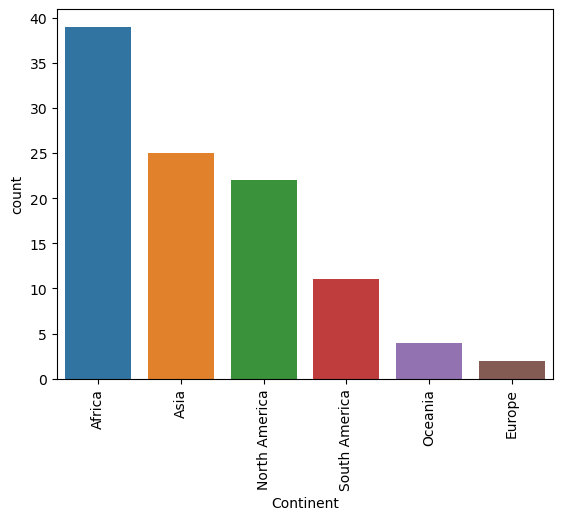

In [103]:
sns.countplot(data = df, x = "Continent", order = df["Continent"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

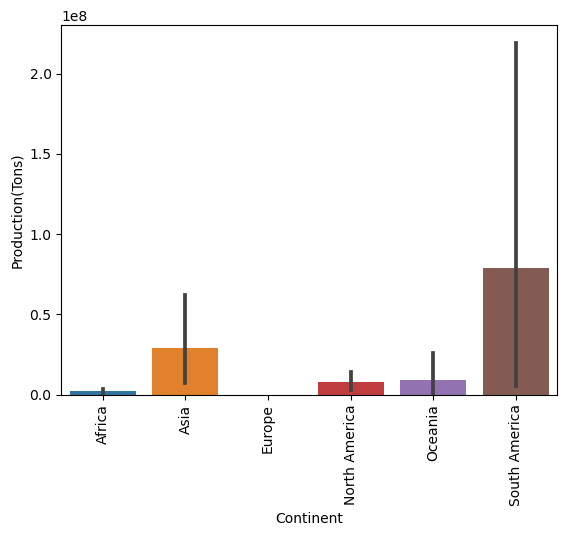

In [104]:
sns.barplot(data = df, x = "Continent", y = "Production(Tons)")
plt.xticks(rotation = 90)
plt.show()